In [1]:
import numpy as np
import sigtem as st
from matplotlib import pyplot as plt

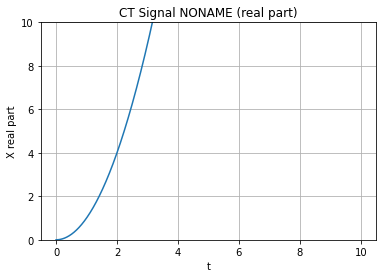

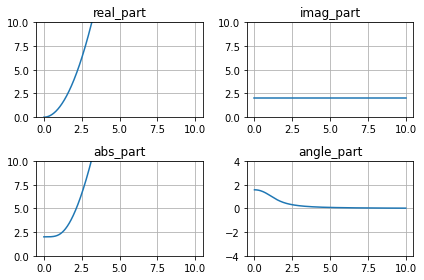

In [2]:
#定义一个连续基本信号(内置默认初始化函数)
s = st.ct_signal()
#展示信号
s.show()
#展示信号的所有部分
s.show_all()

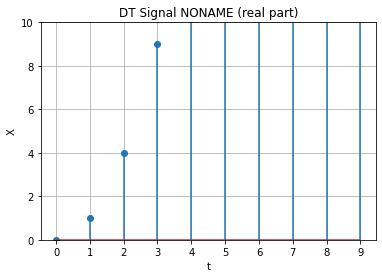

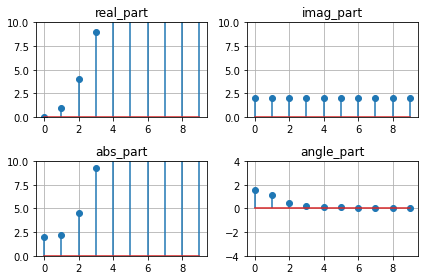

In [3]:
#也可以定义一个离散信号
s=st.dt_signal()
s.show()
s.show_all()

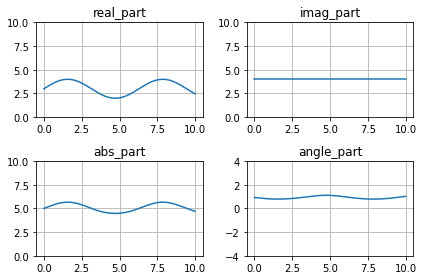

In [4]:
#要设置一个参数确定的信号，可以修改信号中的内置函数实现
def func(t):
    return np.sin(t)+3+4j
s = st.ct_signal()
s.set_function(function=func)
s.show_all()

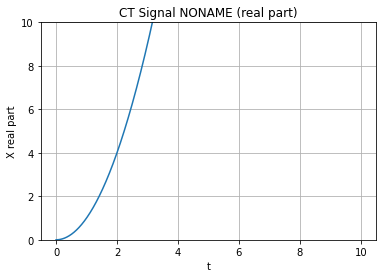

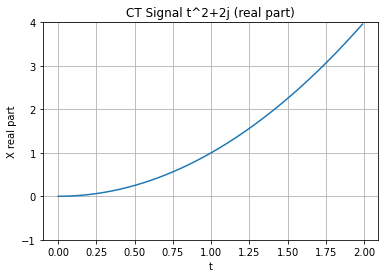

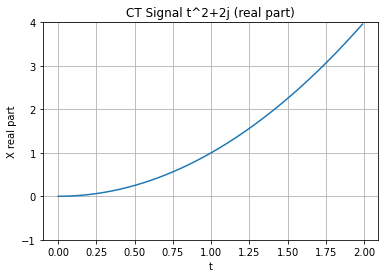

In [5]:
#对于显示窗口，可以手动设定显示的时间，以及信号大小范围，来进行查看
#还可以设定信号的名字，在画面上进行显示
s = st.ct_signal()
s.show()
s.set_t(0,2)
s.set_x(-1,4)
s.set_sname("t^2+2j")
s.show()
#您还可以对于信号的不同部分进行储存,这里存储实部
s.save("test.jpg",form="real")

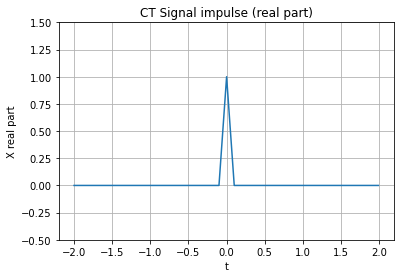

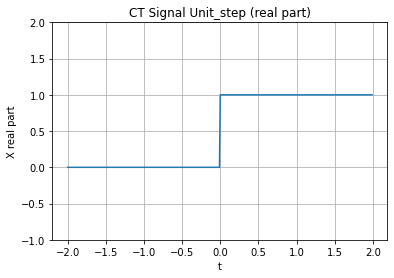

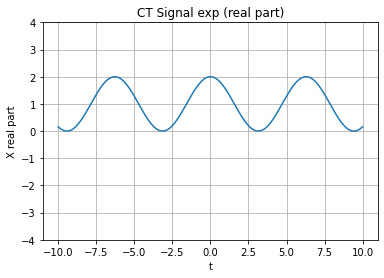

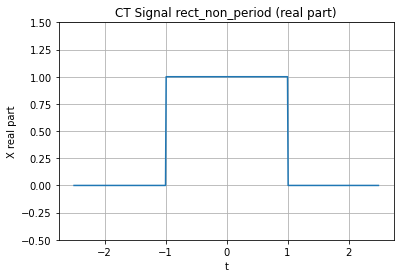

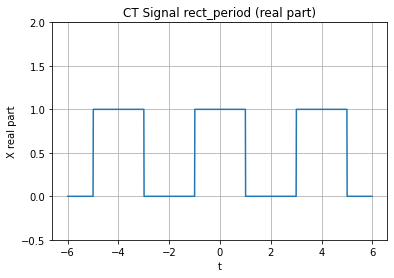

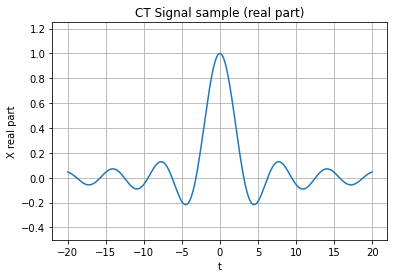

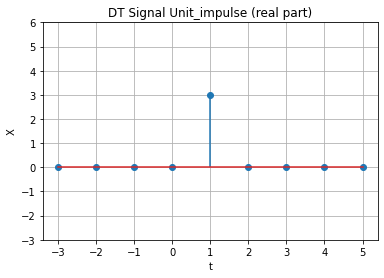

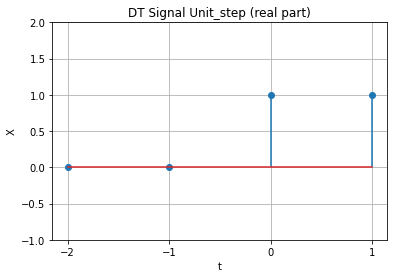

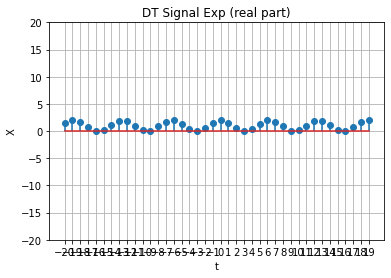

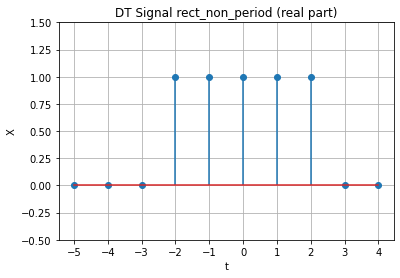

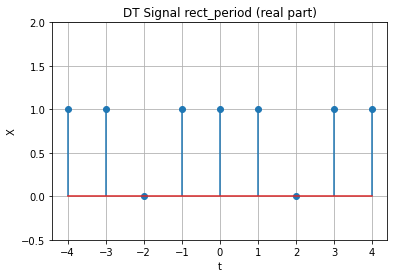

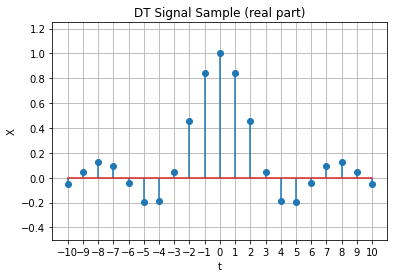

In [6]:
#这里有很多其他信号,对于离散信号仅需将ct改为dt即可
#冲击
s = st.ct_impulse()
s.show()
#阶跃
s = st.ct_unit_step()
s.show()
#指数
s = st.ct_exp(1,0,-1,1)
s.show()
#矩形
s = st.ct_rect(1)
s.show()
#周期方波
s = st.ct_rect_period(1,4)
s.show()
#采样波
s = st.ct_sample()
s.show()
s = st.dt_impulse(1, 3)
s.show()
s = st.dt_unit_step()
s.show()
s = st.dt_exp(1, 0, -1, 1)
s.show()
s = st.dt_rect(2)
s.show()
s = st.dt_rect_period(1,4)
s.show()

s = st.dt_sample()
s.show()
#此外在ct_signals模块中允许任意增添你想要的波形，只需要简单设定参数以及函数形式即可，以上的任意信号的方法基本通用

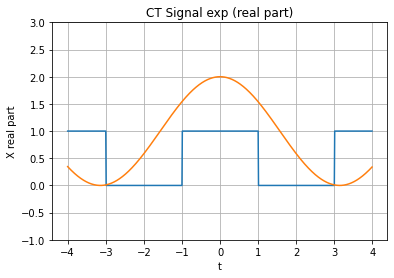

In [7]:
#将两个波形画进一个图中:
s1 = st.ct_rect_period(1,4)
s2 = st.ct_exp(1,0,-1,1)
s1.set_loc(-4,4,-1,3)
s2.set_loc(-4,4,-1,3)
plt.figure()
plt.grid()
s1.draw()
s2.draw()
plt.show()

In [8]:
#获得信号s在时间t的各个部分的具体取值，t可以是一个np数组
s = st.ct_sample()
print(s.get_x(1))
print(s.get_x(np.array([1,2,3,4])))
print(s.get_x_imag(1))

(0.8414709848078965+0j)
[ 0.84147098+0.j  0.45464871+0.j  0.04704   +0.j -0.18920062+0.j]
0.0


False
True


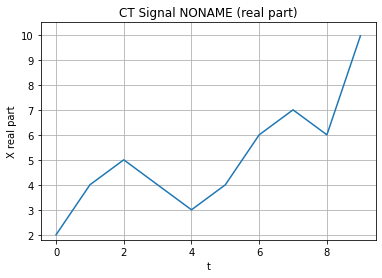

In [9]:
#通过数组定义一个信号，t必须为等间隔数组,此时信号为数组模式
t_array = [0,1,2,3,4,5,6,7,8,9]
x_array = [2,4,5,4,3,4,6,7,6,10]
s = st.ct_signal()
print(s.is_array())
s.set_array(t_array,x_array)
print(s.is_array())
s.show()

In [10]:
#获得信号的各种属性
s = st.ct_sample()
print(s.get_sname())
print(s.get_stype())
print(s.is_array())
print(s.is_impulse())

sample
CT
False
False


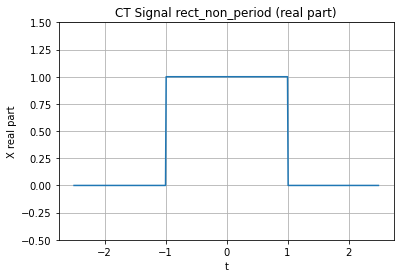

False
/Users/downing/Desktop/signal_t/sigtem/basic.py:62: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if t_array == 'self' and x_array == 'self':
/Users/downing/opt/anaconda3/envs/data/lib/python3.8/site-packages/matplotlib/transforms.py:2837: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


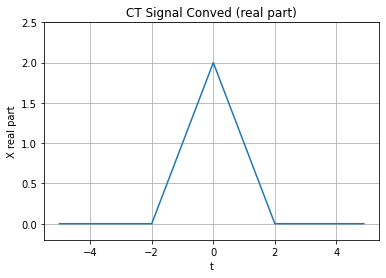

True
/Users/downing/Desktop/signal_t/sigtem/basic.py:62: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if t_array == 'self' and x_array == 'self':
/Users/downing/opt/anaconda3/envs/data/lib/python3.8/site-packages/matplotlib/transforms.py:2837: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


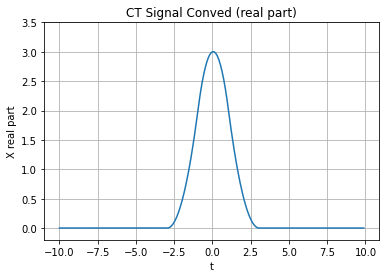

In [11]:
#两个连续信号进行卷积,新得到的信号为数组模式,可通过conv_ct中的可选参数控制信号的范围
s1 = st.ct_rect(1)
s2 = st.ct_rect(1)
s1.show()
print(s1.is_array())
s = st.conv_ct(s1,s2,start=-5,end=5)
s.show()
print(s.is_array())
#甚至还能继续卷下去
ss = st.conv_ct(s1,s)
ss.show()

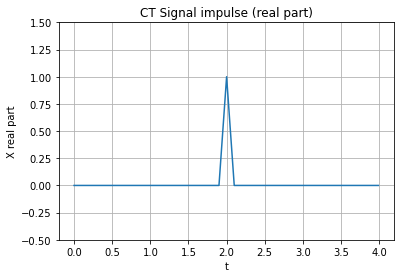

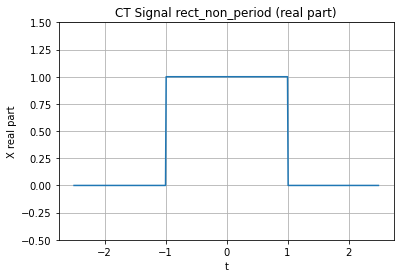

/Users/downing/Desktop/signal_t/sigtem/basic.py:62: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if t_array == 'self' and x_array == 'self':
/Users/downing/opt/anaconda3/envs/data/lib/python3.8/site-packages/matplotlib/transforms.py:2837: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


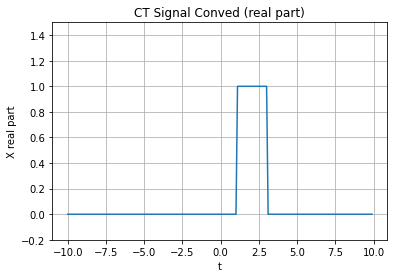

In [12]:
#冲击信号与普通信号的卷积：
s1 = st.ct_impulse(2,1)
s1.show()
s2 = st.ct_rect(1)
s2.show()
s = st.conv_ct(s1,s2)
s.show()

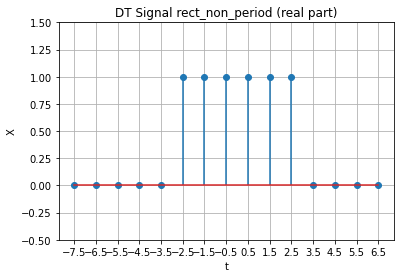

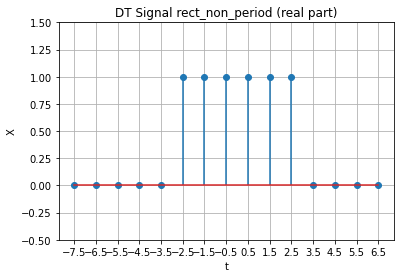

/Users/downing/Desktop/signal_t/sigtem/basic.py:62: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if t_array == 'self' and x_array == 'self':
/Users/downing/opt/anaconda3/envs/data/lib/python3.8/site-packages/matplotlib/transforms.py:2837: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


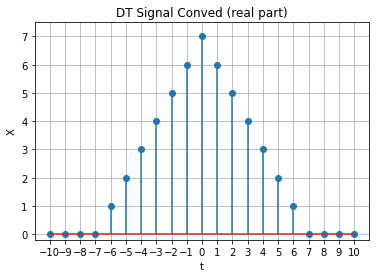

In [13]:
#离散信号卷积：
s1 = st.dt_rect(3)
s1.show()
s2 = st.dt_rect(3)
s2.show()
s = st.conv_dt(s1,s2)
s.show()

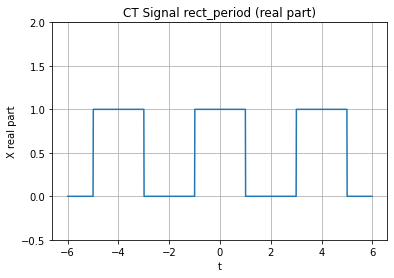

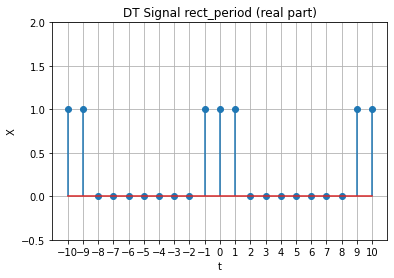

/Users/downing/Desktop/signal_t/sigtem/basic.py:62: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if t_array == 'self' and x_array == 'self':
/Users/downing/opt/anaconda3/envs/data/lib/python3.8/site-packages/matplotlib/transforms.py:2837: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


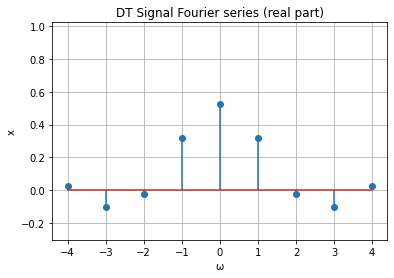

/Users/downing/opt/anaconda3/envs/data/lib/python3.8/site-packages/matplotlib/transforms.py:2837: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


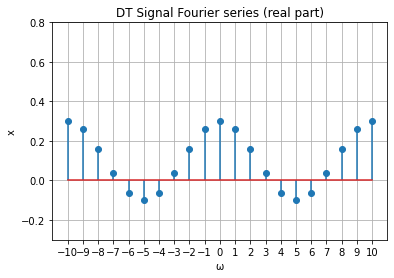

In [14]:
#对于任意一个周期信号，无论是连续还是离散，求其傅立叶级数：
s1 = st.ct_rect_period(1,4)
s2 = st.dt_rect_period(1,10)
s1.show()
s2.show()
ss1 = st.fs(s1)
ss2 = st.fs(s2,-10,12)
ss1.show()
ss2.show()

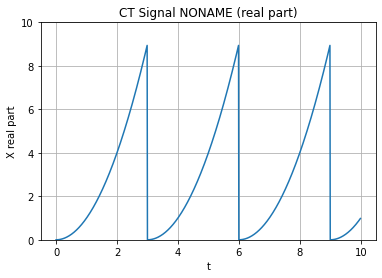

/Users/downing/Desktop/signal_t/sigtem/basic.py:62: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if t_array == 'self' and x_array == 'self':
/Users/downing/opt/anaconda3/envs/data/lib/python3.8/site-packages/matplotlib/transforms.py:2837: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


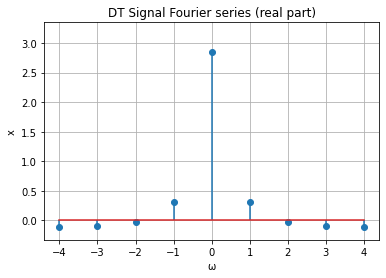

In [15]:
#设定一个周期函数
def func(x):
    return x**2

a = st.ct_signal()
a.set_function(function=func,period=3)
a.show()
q = st.fs(a)
q.show()

/Users/downing/Desktop/signal_t/sigtem/basic.py:62: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if t_array == 'self' and x_array == 'self':


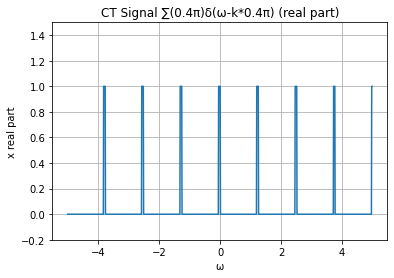

/Users/downing/Desktop/signal_t/sigtem/basic.py:62: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if t_array == 'self' and x_array == 'self':
/Users/downing/opt/anaconda3/envs/data/lib/python3.8/site-packages/matplotlib/transforms.py:2837: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


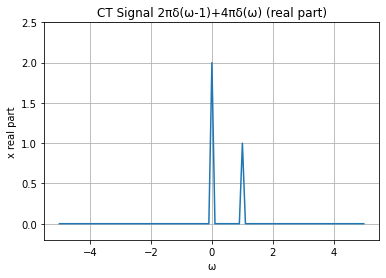

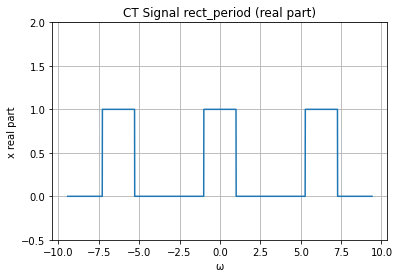

In [16]:
#求任意信号的傅立叶变换
s = st.ct_impulse_train(5)
a = s.get_ft()
a.show()
c = st.ct_exp(1,0,1,2)
s = c.get_ft()
s.show()
s = st.dt_sample()
a = s.get_ft()
a.show()